# Featurizing string - Name, Ticket, Cabin

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
import sys
sys.path.append("../")
from titansurv.preprocessing import NaNDropper
from titansurv.plotting import plot_count, plot_prob

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("../data/raw/train.csv")
dfX = df.drop('Survived', axis=1)
dfy = df.Survived

In [6]:
def FE_Name(x, pattern='([A-Z][a-z]+)\.'):
    x = x.apply(lambda x: re.search(pattern, x).group(1))
    x.replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    x.replace(['Mme'], 'Mrs', inplace=True)
    x.loc[~x.isin(['Mr', 'Mrs', 'Miss', 'Master'])] = 'Special'
    return x.values.reshape(-1, 1)

In [7]:
Name = df.Name

The frequency of each category:
Mr         517
Miss       185
Mrs        126
Master      40
Special     23
dtype: int64

The proportion of each category:
Mr         0.580247
Miss       0.207632
Mrs        0.141414
Master     0.044893
Special    0.025814
dtype: float64



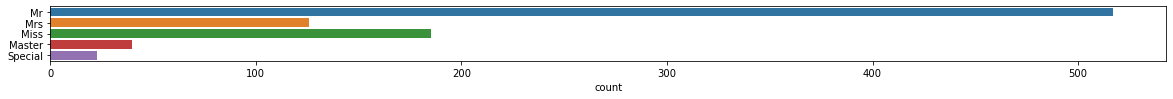

In [8]:
plot_count(pd.Series(FE_Name(Name).ravel()))

In [9]:
Cabin = df.Cabin

In [10]:

def FE_Cabin(x):
    col1 = x.str[0].fillna('NC')
    col1[(col1 == 'G') | (col1 == 'T')] = 'NC'
    return col1.values.reshape(-1, 1)

In [11]:
dfX.loc[df.Cabin == 'T']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [12]:
FE_Cabin(Cabin)

array([['NC'],
       ['C'],
       ['NC'],
       ['C'],
       ['NC'],
       ['NC'],
       ['E'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['C'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['D'],
       ['NC'],
       ['A'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['C'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['B'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['D'],
       ['NC'],
       ['B'],
       ['C'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['B'],
       ['C'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['F'],
       ['

Featurizing Ticket

1. Remove special characters but not space
2. replace numeric strings by 'numeric'
3. split on space and keep the first item


In [13]:
def FE_Ticket(x):
    x = x.str.replace(r'[^A-Za-z0-9\s]+', '')
    x = x.apply(lambda x: x.split(' ')[0] if not x.isdigit() else 'numeric')
    
    return x.values.reshape(-1, 1)

In [14]:
Ticket = df.Ticket

The frequency of each category:
numeric    661
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
A4           7
STONO2       6
SOC          6
C            5
FCC          5
SCParis      4
LINE         4
SCAH         3
WEP          3
SOPP         3
PP           3
SWPP         2
SOTONO2      2
PPP          2
CASOTON      1
SC           1
Fa           1
SOP          1
SP           1
FC           1
AS           1
SCOW         1
SCA4         1
dtype: int64

The proportion of each category:
numeric    0.741863
PC         0.067340
CA         0.046016
A5         0.023569
SOTONOQ    0.016835
STONO      0.013468
WC         0.011223
SCPARIS    0.007856
A4         0.007856
STONO2     0.006734
SOC        0.006734
C          0.005612
FCC        0.005612
SCParis    0.004489
LINE       0.004489
SCAH       0.003367
WEP        0.003367
SOPP       0.003367
PP         0.003367
SWPP       0.002245
SOTONO2    0.002245
PPP        0.002245
CASOTON    0.001

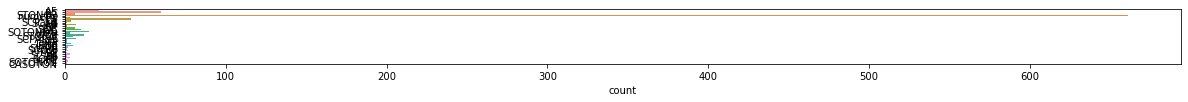

In [15]:
plot_count(pd.Series(FE_Ticket(Ticket).ravel()))

In [16]:
pre1 = Pipeline([
    ('nan_drpr', NaNDropper(['Embarked']))
])

dfX, dfy = pre1.fit_transform(dfX, dfy)

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
@np.vectorize
def binary_enc(x):
    if x == 'numeric':
        return 1
    else:
        return 0
binarizer = FunctionTransformer(binary_enc)

In [19]:
FunctionTransformer(FE_Ticket).fit_transform(Ticket)

array([['A5'],
       ['PC'],
       ['STONO2'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['PP'],
       ['numeric'],
       ['A5'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['PC'],
       ['PC'],
       ['numeric'],
       ['CA'],
       ['PC'],
       ['numeric'],
       ['numeric'],
       ['A5'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['SCParis'],
       ['numeric'],
       ['SCA4'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['numeric'],
       ['A4'],
       ['PC'],

In [20]:
binarizer.fit_transform(FunctionTransformer(FE_Ticket).fit_transform(Ticket))

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [21]:
def FE_SibSp(arr: np.array):
    arr = arr.copy()
    arr[arr>1] = 2
    if len(arr.shape) == 1:
        arr = arr.reshape(-1, 1)
    return arr

In [22]:
def FE_Parch(arr: np.array):
    arr = arr.copy()
    arr[arr>1] = 2
    if len(arr.shape) == 1:
        arr = arr.reshape(-1, 1)
    return arr

The following were the preprocessing steps used: 
1. **Embarked**: Dropped NA rows and applied OneHotEncoding
2. **Age** : Applied Mean Imputation and Mean Normalization
3. **Fare**: Mean Normalization
4. **Sex**: OneHotEncoding
5. **Name**: Categorised into ['Mr', 'Mrs', 'Miss', 'Master', 'Special']<br/> 
    5.1 Rename [Mlle, Ms] -> Miss      
    5.2 Rename [Mme] -> Mrs     
    5.3 Put the Rest -> Special     
    Then performed OneHotEncoding
6. **Ticket** categorized into [1: numeric, 0: else] <br/>
    6.1 Remove special characters but not space <br/>
    6.2 Replace numeric strings by 'numeric' <br/>
    6.3 Split on space and keep the first item <br/>
 Then applied binarizer for [1: numeric, 0: else]
7. **SibSp** binned into [0, 1, >1] and applied OneHotEncoding
8. **Parch** binned into [0, 1, >1] and applied OneHotEncoding

Tuned ML model: **RandomForestClassifier** using GridSearchCV

In [29]:
imp_scale = Pipeline([
    ('imp', SimpleImputer()),
    ('scaler', StandardScaler())
], 'passthrough')

pre_Name = Pipeline([
    ('featurize', FunctionTransformer(FE_Name)),
    ('enc', OneHotEncoder(categories=[['Mr', 'Mrs', 'Miss', 'Master', 'Special']],
                          drop='first'))
])

# TODO: Implement modify pipeline function for DRY
pre_Cabin = Pipeline([
    ('featurize', FunctionTransformer(FE_Cabin)),
    ('enc', OneHotEncoder(categories=[['A', 'B', 'C', 'D', 
                                      'E', 'F', 'NC']], 
                          drop='first'))
])

pre_Ticket = Pipeline([
    ('featurize', FunctionTransformer(FE_Ticket)),
    ('binarizer', binarizer)
])

pre_SibSp = Pipeline([
    ('binner', FunctionTransformer(FE_SibSp)),
    ('enc', OneHotEncoder(drop='first'))
])

pre_Parch = Pipeline([
    ('binner', FunctionTransformer(FE_Parch)),
    ('enc', OneHotEncoder(drop='first'))
])


precomb = ColumnTransformer([
    ('enc', OneHotEncoder(drop='first'), ['Sex', 'Embarked']),
    ('imp_scaler', imp_scale, ['Age']),
    ('scaler', StandardScaler(), ['Fare']),
    ('pre_Name', pre_Name, 'Name'),
    ('pre_Cabin', pre_Cabin, 'Cabin'),
    ('pre_Ticket', pre_Ticket, 'Ticket'),
#     ('Pre_SibSp', pre_SibSp, ['SibSp']),
#     ('Pre_Parch', pre_Parch, ['Parch'])
], 
    'passthrough')

In [32]:
precomb.fit_transform(dfX).shape

(889, 20)

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [193]:
pipe = Pipeline([
    ('preprocessing', precomb),
    ('clf', RandomForestClassifier())
])
pipe.fit(dfX, dfy)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('enc',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Sex', 'Embarked']),
                                                 ('imp_scaler',
                                                  Pipeline(memory='passthrough',
                                                         

In [194]:
from titansurv.utils import print_params
print_params(pipe)

['memory',
 'steps',
 'verbose',
 'preprocessing',
 'clf',
 'preprocessing__n_jobs',
 'preprocessing__remainder',
 'preprocessing__sparse_threshold',
 'preprocessing__transformer_weights',
 'preprocessing__transformers',
 'preprocessing__verbose',
 'preprocessing__enc',
 'preprocessing__imp_scaler',
 'preprocessing__pre_Name',
 'preprocessing__pre_Cabin',
 'preprocessing__pre_Ticket',
 'preprocessing__enc__categories',
 'preprocessing__enc__drop',
 'preprocessing__enc__dtype',
 'preprocessing__enc__handle_unknown',
 'preprocessing__enc__sparse',
 'preprocessing__imp_scaler__memory',
 'preprocessing__imp_scaler__steps',
 'preprocessing__imp_scaler__verbose',
 'preprocessing__imp_scaler__imp',
 'preprocessing__imp_scaler__scaler',
 'preprocessing__imp_scaler__imp__add_indicator',
 'preprocessing__imp_scaler__imp__copy',
 'preprocessing__imp_scaler__imp__fill_value',
 'preprocessing__imp_scaler__imp__missing_values',
 'preprocessing__imp_scaler__imp__strategy',
 'preprocessing__imp_scaler

In [195]:
pipe.score(dfX, dfy)

1.0

In [196]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, dfX, dfy).mean()

0.8189360756681268

In [163]:
from sklearn.model_selection import GridSearchCV

In [156]:
%%time
max_features = [2, 4, 6]
n_estimators = [10, 50, 100, 125]
min_samples_split = [2, 5, 10, 20]
max_depth = [None, 5, 10, 25, 50, 100]
min_samples_leaf = [1, 2, 5, 10]

param_grid = {
    'clf': [RandomForestClassifier()],
    'clf__max_features': max_features,
    'clf__n_estimators': n_estimators,
    'clf__min_samples_split': min_samples_split,
    'clf__max_depth': max_depth,
    'clf__min_samples_leaf': min_samples_leaf
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(dfX, dfy)

KeyboardInterrupt: 

In [297]:
print(grid.best_score_)
print(grid.best_params_)

0.8414206817749001
{'clf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'clf__max_depth': None, 'clf__max_features': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 50}


In [296]:
grid.estimator.named_steps

{'preprocessing': ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('enc',
                                  OneHotEncoder(categories='auto', drop='first',
                                                dtype=<class 'numpy.float64'>,
                                                handle_unknown='error',
                                                sparse=True),
                                  ['Sex', 'Embarked']),
                                 ('imp_scaler',
                                  Pipeline(memory='passthrough',
                                           steps=[('imp',
                                                   SimpleImputer(add_indicator=False,
                                                                 copy=Tr...
                                                                       validate=False)),
                                              

## Making the Submission

In [304]:
test = pd.read_csv("../data/raw/test.csv")
testX = test.drop(['PassengerId'], axis=1)


In [311]:
pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': grid.predict(testX)}).to_csv('../data/submission/Pipeline2.csv', header=1, index=False)